In [1]:
import pandas as pd
#Configuración de parametros de Pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None

# En produccion eliminar, se incluye por informacion
print(f'Pandas Version: {pd.__version__}') 

Pandas Version: 1.5.3


In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
X_train = pd.read_csv('D:\\Pedro\\FIUBA\\Inteligencias Artificial\\X_train_con_UMAP.csv', encoding = 'unicode_escape')
X_test = pd.read_csv('D:\\Pedro\\FIUBA\\Inteligencias Artificial\\X_test_con_UMAP.csv', encoding = 'unicode_escape')

y_train = pd.read_csv('D:\\Pedro\\FIUBA\\Inteligencias Artificial\\y_train.csv', encoding = 'unicode_escape').to_numpy().reshape(-1)
y_test = pd.read_csv('D:\\Pedro\\FIUBA\\Inteligencias Artificial\\y_test.csv', encoding = 'unicode_escape').to_numpy().reshape(-1)

In [5]:
len(X_train), len(X_test)

(38312, 16422)

In [6]:
import xgboost as xgb

In [7]:
xgb_clf = xgb.XGBClassifier()

In [8]:
xgb_clf.load_model('D:\\Pedro\\FIUBA\\Inteligencias Artificial\\XGBoost_Model.json')

In [9]:
xgb_clf

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              feature_types=['float', 'int', 'int', 'int', 'float', 'float',
                             'int', 'int', 'int', 'int', 'int', 'int', 'int',
                             'int', 'int', 'int', 'int', 'int', 'int', 'int',
                             'int',...
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [10]:
from joblib import load

In [11]:
rf_clf = load('D:\\Pedro\\FIUBA\\Inteligencias Artificial\\RF_Model.joblib')

D:\Anacondas\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
D:\Anacondas\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [12]:
lgbm_clf = load('D:\\Pedro\\FIUBA\\Inteligencias Artificial\\LGBM_Model.joblib')

D:\Anacondas\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [13]:
rf_clf

RandomForestClassifier(max_depth=15, random_state=10)

In [14]:
lgbm_clf

LGBMClassifier(learning_rate=0.01, random_state=10)

In [15]:
from sklearn.ensemble import VotingClassifier

In [16]:
voting_clf = VotingClassifier(estimators=[('lgbm_clf', lgbm_clf), ('rf_clf', rf_clf), ('xgb_clf', xgb_clf)], voting='soft')

In [17]:
voting_clf

VotingClassifier(estimators=[('lgbm_clf',
                              LGBMClassifier(learning_rate=0.01,
                                             random_state=10)),
                             ('rf_clf',
                              RandomForestClassifier(max_depth=15,
                                                     random_state=10)),
                             ('xgb_clf',
                              XGBClassifier(alpha=10, base_score=None,
                                            booster=None, callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=Fa...
                                            gamma=None, gpu_id=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, ...))],
                 voting='soft')

In [18]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lgbm_clf',
                              LGBMClassifier(learning_rate=0.01,
                                             random_state=10)),
                             ('rf_clf',
                              RandomForestClassifier(max_depth=15,
                                                     random_state=10)),
                             ('xgb_clf',
                              XGBClassifier(alpha=10, base_score=None,
                                            booster=None, callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=Fa...
                                            gamma=None, gpu_id=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, ...))],
                 voting='soft')

In [19]:
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [20]:
preds = voting_clf.predict(X_test)

In [21]:
recall_score(y_test, preds)

0.7990500548045305

In [22]:
accuracy_score(y_test, preds)

0.7596516867616612

In [23]:
cm = confusion_matrix(y_test, preds)

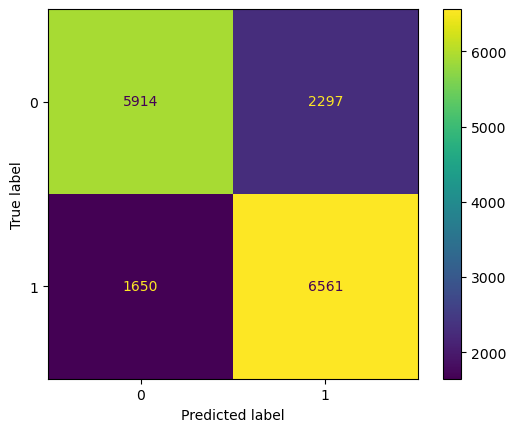

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_clf.classes_)
disp.plot()